# **Importing the necessary libraries**

> Yapay zekâ kütüphanesi olan **keras** kütüphanesinin **Sequential** fonksiyonu ile boş bir yapay sinir ağı modeli oluşturmak için gerekli olan sınıf çağrılır. 

> Yapay zekâ kütüphanesi olan **keras** kütüphanesinin **Dense, Input ve Dropout** fonksiyonu ile yapay sinir ağı tam bağlı katmanları tanımlamak için gerekli olan sınıf çağrılır. 

> Matematiksel dizi işlemlerini gerçekleştirmek için **numpy** kütüphanesi çağrılır. 

> Veri okuma işlemini gerçekleştirmek için **pandas** kütüphanesi çağrılır. 

> Veri setini bölmek için **sklearn.model_selection** kütüphanesinden **train_test_split** fonksiyonu çağrılır. 

> Model eğitiminden elde edilen sonuçları çizdirmek için **matplotlib.pyplot** kütüphanesi çağrılır. 

> sklearn kütüphanesinden **metrics** fonksiyonu ile modelin değerlendirebilmesi için gerekli fonksiyon çağrılır. 

> Veri ölçeklendirme işlemi için **sklearn.preprocessing** kütüphanesinden **StantardScaler** fonksiyonu çağrılır. 

> Yapay sinir ağı modeli oluşturmak için **tensorflow.keras.models** kütüphanesinden **Model** fonksiyonu çağrılır. 

> Yapay zekâ kütüphanesi olan **tensorflow** kütüphanesi çağrılır. 

> Yapay sinir ağı modeli eğitilirken istenilen doğruluk oranına ulaşıldığında eğitimin durması için **keras.callbacks** kütüphanesinden **EarlyStopping** fonksiyonu çağrılır. 

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
import tensorflow as tf
from keras.callbacks import EarlyStopping

2024-05-22 19:31:10.232149: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-22 19:31:10.232297: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-22 19:31:10.391851: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Dividing the data set for input, output and training**

> **pandas** kütüphanesinin **read_excel** özelliğini kullanarak veri seti ile aynı konumda olan kod dosyasının içerisindeki *‘ENB2012_data.xlsx’* veri dosyasını okuyarak dataset değişkenine aktarır. 

> **values** fonksiyonu ile excel veri seti dosyasındaki *başlıklar hariç* verileri okur ve 
> **iki boyutlu diziye** dönüştürür. 

> **dataset** değişkenindeki veri setindeki ilk sekiz sütunu **([:,0:8] )** giriş parametresi olarak ayarlayarak **“X”** değişkenine aktarır. 

> **dataset** değişkeninde yer alan veri setindeki dokuzuncu ve onuncu sütunu **([:,8:10] )** çıkış parametresi olarak ayarlayarak **“y”** değişkenine aktarır. 

> Veri setindeki eğitim ve test verilerini %80 eğitim, %20 test olacak şekilde **“test_size=0,2”** komutu kullanarak rastgele ayırır.

In [2]:
dataset = pd.read_excel('/kaggle/input/bina-enerji-verimlilii-veri-seti/ENB2012_data.xlsx')
dataset = dataset.values
X = dataset[:, 0:8]
y = dataset[:, 8:10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Scaling of the dataset**

> **StandardScaler** fonksiyonunu tanımlayarak **sc** değişkenine aktarır. Yani her özelliği *ortalaması 0 ve standart sapması 1* olacak şekilde dönüştürür. 

> Eğitim ve test giriş verilerinin **“fit_transform”** ve **“transform”** özellikleri kullanılarak ölçeklendirilir. 

> Ölçeklendirilen giriş ve çıkış verileri **numpy** kütüphanesi kullanılarak YSA ile eğitim yapabilmek için **array formatına** dönüştürülür.

> Modelin iki çıktısı vardır: first_output ve second_output.
> Verilerin Dağıtılması: model.fit fonksiyonunda verileri **[data_y_train[:, 0], data_y_train[:, 1]]** şeklinde kullanarak her bir çıktının hedef değerlerini doğru şekilde belirtmiş oluyoruz.
> Tuple Gerekliliği: Tuple kullanmaya gerek yok çünkü modelin fit metodu doğrudan listelerle çalışacak şekilde tasarlanmıştır.

> **\ işareti**, Python'da satırın devam edeceğini belirtir. Bu, uzun kod satırlarının okunabilirliğini artırmak için kullanılır.

In [3]:
sc = StandardScaler()
data_x_train_scaled = sc.fit_transform(X_train)
data_x_test_scaled = sc.transform(X_test)

data_x_train_scaled, data_x_test_scaled, data_y_train, data_y_test = \
    np.array(data_x_train_scaled), np.array(data_x_test_scaled), np.array(y_train), \
    np.array(y_test)

# **Setup of the artificial neural network model**

> Giriş parametresi ile eşit nöron sayılı **giriş katmanı** oluşturulur. 

> *128 nöronlu ve Relu aktivasyon* fonksiyonlu **ilk gizli katman**ı oluşturularak giriş katmanına bağlanır. 

> **“Dropout”** ilk gizli katmandaki **[0,3]** ifadesi ile %30 oranında önemsiz nöronlar dışarıya bırakılır (yani kullanılmaz). Dolayısıyla YSA modeli eğitim süreci hızlanır, **aşırı öğrenme (overfitting)** engellenir. 

> *128 nöronlu ve Relu aktivasyon* fonksiyonlu **ikinci gizli katman** oluşturularak ilk gizli katmana bağlanır. 

> **“Dropout”** ikinci gizli katmandaki **[0,3]** ifadesi ile %30 oranında önemsiz nöronlar dışarıya bırakılır (yani kullanılmaz). Dolayısıyla YSA modeli eğitim süreci hızlanır, aşırı öğrenme (overfitting) engellenir. 

> **Birinci çıkış parametresi** için tek **(1) nöronlu** son katmanı alır. 

> **İkinci çıkış** için kullanmak üzere *64 nöronlu gizli katmanı ve Relu aktivasyon* 
fonksiyonlu* **son gizli katman**ı oluşturur. 

> **“Dropout”** son gizli katmandaki **[0,3]** ifadesi ile %30 oranında önemsiz nöronlar dışarıya bırakılır (yani kullanılmaz). Dolayısıyla YSA modeli eğitim süreci hızlanır, aşırı öğrenme (overfitting) engellenir. 

> **İkinci çıkış** parametresi için tek (1) nöronlu son katmanı alır. 

> **“Model”** fonksiyonu kullanılarak YSA modelin giriş ve çıkış katmanları tanımlanarak *“model”* değişkenine aktarılır. 

> Oluşturulan yapay sinir ağı modelindeki nöronların, giriş çıkış parametrelerine ait özellikleri **“.summary”** fonksiyonu ile görür. 

In [4]:
input_layer = Input(shape=(data_x_train_scaled.shape[1],), name='Input_Layer')
common_path = Dense(units=128, activation='relu', name='First_Dense')(input_layer)
common_path = Dropout(0.3)(common_path)
common_path = Dense(units=128, activation='relu', name='Second_Dense')(common_path)
common_path = Dropout(0.3)(common_path)
first_output = Dense(units=1, name='First_Output__Last_Layer')(common_path)
second_output_path = Dense(units=64, activation='relu', name='Second_Output__First_Dense')(common_path)
second_output_path = Dropout(0.3)(second_output_path)
second_output = Dense(units=1, name='Second_Output__Last_Layer')(second_output_path)

model = Model(inputs=input_layer, outputs=[first_output, second_output])
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input_Layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ First_Dense (Dense) │ (None, 128)       │      1,152 │ Input_Layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ First_Dense[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Second_Dense        │ (None, 128)       │     16,512 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ Second_Dense[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Second_Output__Fir… │ (None, 64)        │      8,256 │ dropout_1[0][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ Second_Output__F… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ First_Output__Last… │ (None, 1)         │        129 │ dropout_1[0][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Second_Output__Las… │ (None, 1)         │         65 │ dropout_2[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 26,114 (102.01 KB)

 Trainable params: 26,114 (102.01 KB)

 Non-trainable params: 0 (0.00 B)

None


# **Defining the parameters of the artificial neural network model**

> **“keras”** kütüphanesini **“optimizers”** sınıfı ile **SGD optimizasyon** yöntemi kullanılarak **öğrenme oranı (learning rate)** değeri *yüz binde bir (0,00001)* olarak belirlenip **“optimizer”** değişkenine aktarılmıştır. 

> **“compile”** fonksiyonu ile kayıp veri değerlerini **“mse (mean square error)”**,optimizasyon yöntemi olarak **“SGD”** ve ölçüm metriği olarak **“RootMeanSquaredError (RMSE)”** parametrelerine göre derler. 

> **“mse”**, ifadesinin makine öğrenmesi modelindeki ortalama kare hatayı hesaplamak için kullanılır. **”RootMeanSquaredError (RMSE)”** ifadesi, makine öğrenmesi modelinin tahmin ettiği değerler ile eğitim verisindeki gerçek değerler arasındaki uzaklığı hesaplar.

> **Earlystopping** özelliği ile modelin eğitimi esnasında **“rmse”** değerinin stabil 
(durağan) olduğu durumda eğitimi durdurur. Kod satırlarında yer alan **“min_delta=0”** ifadesi 
modelin stabil kaldığı anlamına gelir. **“patience=10”** ifadesi ise eğitim esnasında *10 epoch* 
(tekrar) boyunca modelin doğruluğu değişmez ise eğitim durdurulur. **“verbose=1”** ise eğitim 
esnasında eğitim sonuçlarını ekranda gösterir. 

In [5]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.00001)
model.compile(optimizer=optimizer,
              loss={'First_Output__Last_Layer': 'mse', 'Second_Output__Last_Layer': 'mse'},
              metrics={'First_Output__Last_Layer': tf.keras.metrics.RootMeanSquaredError(),
                       'Second_Output__Last_Layer': tf.keras.metrics.RootMeanSquaredError()})

earlyStopping_callback = EarlyStopping(monitor='val_loss',
                                       min_delta=0,
                                       patience=10,
                                       verbose=1) 

# **Training and prediction processes in artificial neural networks model**

> **“model.fit”** komutu yazarak ölçeklendirilmiş giriş eğitim verilerine göre çıkış eğitim verileri için yapay sinir ağları ile eğitim gerçekleştirir. Burada her bir eğitim için **“batch_size”** fonksiyonuna aktarılan 10 değeri ile eğitime alınacak veri sayısı belirlenmektedir. 

> Yine **(epochs=500)**, **“verbose=0”** ifadeleri ile 500 adet eğitim gerçekleştirileceği ve her bir eğitimde elde edilecek sonuçların konsolda gösterilmeyeceği belirtilmektedir.

> Eğitilen modelin doğrulaması eğitim verilerinin %30’u alınarak **(validation_split=0,3)** gerçekleştirilir. Ayrıca **callbacks** özelliği kapsamında **earlystopping_callback** tanımlanarak eğitimin erken durma özelliği aktif hale getirilmiştir. 
 
> YSA ile eğitim işlemi sonunda giriş test verilerine göre **“.predict”** fonksiyonu ile ısıtma ve soğutma yükü için tahminleme işlemini gerçekleştirir. 

> **“sklearn.metrics”** kütüphanesinden **“r2_score”** özelliğini yükler. 

> YSA modelinden elde edilen tahmin sonuçları ile gerçek sonuçlar karşılaştırılarak elde edilen iki boyutlu dizi sonuçları **“.flatten”** fonksiyonu kullanılarak *tek boyutlu* 
diziye çevrilir, sonuçlar **R2** performans ölçüt kriterine göre doğruluk değerleri **“print”** komutu kullanılarak konsola yazdırılır. 

> Regresyon analizlerinde, deneysel verilerin doğrusal bir eğriye ne kadar uyumlu olduğunu belirlemede **“Determinasyon katsayısı/R2”** değeri kullanılır. **R2=1** olması, deneysel verilerin kusursuz bir doğrusal eğri sağladığının kanıtıdır. 



In [6]:
history = model.fit(x=data_x_train_scaled, y=[data_y_train[:, 0], data_y_train[:, 1]], 
                    verbose=0, epochs=500, batch_size=10, validation_split=0.3, 
                    callbacks=earlyStopping_callback)

y_pred = np.array(model.predict(data_x_test_scaled))

from sklearn.metrics import r2_score
print("İlk çıkışın R2 değeri :", r2_score(data_y_test[:, 0], y_pred[0].flatten()))
print("İkinci çıkışın R2 değeri:", r2_score(data_y_test[:, 1], y_pred[1].flatten()))

Epoch 121: early stopping
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
İlk çıkışın R2 değeri : 0.8359591335371751
İkinci çıkışın R2 değeri: 0.7740779330490707


# **Drawing training and validation graphs based on lost output data from the ANN model**

> Isıtma ve soğutma yüküne ait kayıp çıkış verilerine göre *eğitim ve doğrulama grafikleri* çizdirilmiştir.

> **İlk çıkış** için **RMSE kayıp değerleri**,**ikinci çıkış** için **RMSE kayıp değerleri**ne ait grafikler çizdirilmiştir. 

> Grafikler incelendiğinde eğitim ve test verilerindeki kayıp veri oranlarının azalması modelin doğru biçimde eğitildiğinin göstergesidir. 

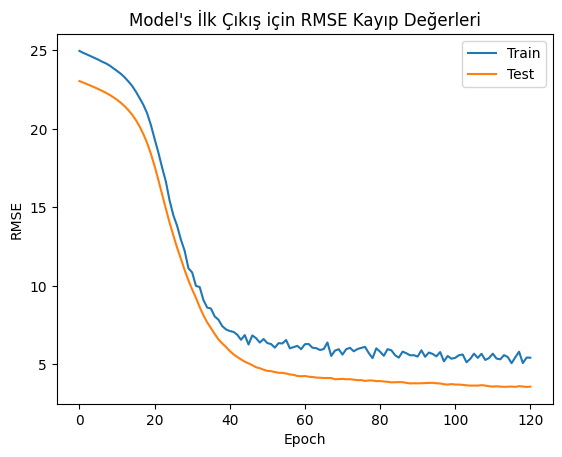

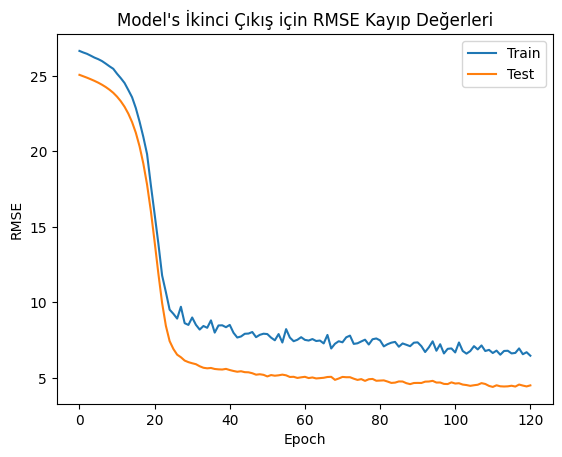

In [7]:
plt.plot(history.history['First_Output__Last_Layer_root_mean_squared_error'])
plt.plot(history.history['val_First_Output__Last_Layer_root_mean_squared_error'])
plt.title('Model\'s İlk Çıkış için RMSE Kayıp Değerleri')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()
plt.figure()

plt.plot(history.history['Second_Output__Last_Layer_root_mean_squared_error'])
plt.plot(history.history['val_Second_Output__Last_Layer_root_mean_squared_error'])
plt.title('Model\'s İkinci Çıkış için RMSE Kayıp Değerleri')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()